# Cracking the code interview

## 8 Object Oriented programming

### 8.2 Employees

Check later python properties and Abstract classes

Plus remember UML from Martin book

In [23]:
import datetime
class Call:
    def __init__(self, number='Unknown'):
        self.tel_number = number
        self.started_at = datetime.datetime.now()
        self.finished_at = None
        
    def finish(self):
        self.finished_at = datetime.datetime.now()
        
    def __repr__(self):
        return "[{}: {}]".format(self.started_at, self.tel_number)

In [24]:
def busy_while_work(work_method):
        def wrapper(self, call):
            self.is_free = False
            work_method(self, call)
            self.is_free = True
        return wrapper
    
def finish_call(work_method):
    def wrapper(self, call):
        work_method(self, call)
        call.finish()
    return wrapper

In [26]:
from abc import ABC
# It would be interesting if it was an
# abstract class with dispatch-call abstract method

class Employee:
    def __init__(self, name):
        self.name = name
        self.is_free = True
        
    def dispatch_call(self, call):
        print("Call {} is dispatching now".format(call))

In [27]:
class Operator(Employee):
    def __init__(self, name):
        Employee.__init__(self, name)
    
    @busy_while_work
    @finish_call
    def dispatch_call(self, call):
        print("We will help you in near time. {} loves you".format(self.name))
        
class Manager(Employee):
    def __init__(self, name):
        Employee.__init__(self, name)
    
    @busy_while_work
    @finish_call
    def dispatch_call(self, call):
        print("I, {}, will manage your question".format(self.name))
    
class Director(Employee):
    def __init__(self, name):
        Employee.__init__(self, name)
        
    @busy_while_work
    @finish_call
    def dispatch_call(self, call):
        print("I don't giva a fu** about your problems. And my name is {}".format(self.name))

In [28]:
calls = [Call(i) for i in range(10)]

# This should by asynchronious
operators = [Operator('Tonny'), Operator('Manny')]
managers = [Manager('Bonny'), Manager('Donny')]
directors = [Director('Conny Monny'), Director('X')]

def dispatch_call(call: Call):
    for employee in operators + managers + directors:
        if employee.is_free:
            employee.dispatch_call(call)
            break

In [29]:
for call in calls:
    dispatch_call(call)

We will help you in near time. Tonny loves you
We will help you in near time. Tonny loves you
We will help you in near time. Tonny loves you
We will help you in near time. Tonny loves you
We will help you in near time. Tonny loves you
We will help you in near time. Tonny loves you
We will help you in near time. Tonny loves you
We will help you in near time. Tonny loves you
We will help you in near time. Tonny loves you
We will help you in near time. Tonny loves you


In [20]:
# It's because Tonny is very fast and also is very first

### 8.3  Jukebox

Let it be an old jukebox with 3 buttons (left, right, play), which are active after payment

In [57]:
class MusicPlate:
    def __init__(self, autor, name):
        '''
        autor: autor name
        name: name of track or album on plate
        '''
        self.autor = autor
        self.name = name
    
    def __repr__(self):
        return "[{} - {}]".format(self.autor, self.name)

In [30]:
# We can use exceptions here of course
class NotEnoughMoney(Exception):
    pass

In [58]:
class JukeBox:
    def __init__(self, music_plates, cost):
        self.is_playing = False
        self.current_plate_idx = 0
        self.plates = music_plates
        self.payment_made = False
        self.money_amount = 0
        self.money_given = 0
        self.cost = cost
        
    def left(self):
        if self.payment_made and not self.is_playing:
            if self.current_plate_idx > 0:
                self.current_plate_idx -= 1
    
    def right(self):
        if self.payment_made and not self.is_playing:
            if self.current_plate_idx < len(self.plates)-1:
                self.current_plate_idx += 1
    
    
    def pay(self, amount):
        '''
        We can pay many times, while we didn't pay enough
        When we pay enough in summary, odd money will be returned
        After that you can choose track using left and right methods and strart playing selected track
        '''
        money_to_return = 0
        if not self.is_playing and not self.payment_made:
            self.money_given += amount
            if self.money_given >= self.cost:
                self.money_amount += self.money_given
                money_to_return = self.money_given - self.cost
                self.money_given = 0
                self.payment_made = True
        return money_to_return
    
    def play(self):
        if not self.is_playing and self.payment_made:
            self.is_playing = True
            current_plate = self.plates[self.current_plate_idx]
            print(current_plate, "is playing now!")
            self.is_playing = False
            self.payment_made = False   

In [59]:
names = ['Bob', 'Alice', 'Juke', 'Nook', 'Rocky']
families = ['Nelson', 'Simson', 'Andersen']
tracks = ['Star Dinner', 'Beach washing']

music_plates_collection = []
for name in names:
    for family in families:
        for track in tracks:
            autor = "{} {}".format(name, family)
            music_plates_collection.append(MusicPlate(autor, track))

In [60]:
len(music_plates_collection)

30

In [61]:
music_box = JukeBox(music_plates_collection, 30)

In [62]:
music_box.left()

In [63]:
music_box.play()

In [64]:
music_box.pay(15)

0

In [65]:
music_box.play()

In [66]:
music_box.pay(16)

1

In [67]:
music_box.play()

[Bob Nelson - Star Dinner] is playing now!


In [68]:
music_box.play()

In [69]:
music_box.pay(66)

36

In [70]:
music_box.money_amount

97

In [72]:
music_box.right()
music_box.play()

[Bob Nelson - Beach washing] is playing now!


### 8.3 Parking

In [ ]:
# Start from simple. Let's imagine that each driver has only 1 car

In [6]:
# What average person has
class Car:
    def __init__(self, id):
        self.id = id    

class Person:
    def __init__(self, name, car):
        self.name = name
        self.car = car

In [10]:
class Place:
    def __init__(self):
        self.__client = None
    
    def set_client(self, client):
        self.__client = client
        
    def is_empty(self):
        return self.__client is None
    
    def __repr__(self):
        return "[{} | {}]".format(self.client)

In [8]:
class Stage:
    def __init__(self, n):
        self.places = [Place() for i in range(n)]
        
    # Get place by car  and get place by client would be a nice feature

In [13]:
# Здесь неплохо было бы использовать реляционные отношения и БД
# так мы могли бы быстро запросить все машины клиента или все его места

In [14]:
a = [1,2,3,4,5]

In [11]:
class Parking:
    def __init__(self, stages_count, places_per_stage):
        self.stages = [Stage(places_per_stage) for i in range(stages_count)]
        self.clients = set()
        
    def take_car_for(self, client):
        # We can add new class ParkingClient and it will have pointer to it's place
                
            
    def leave_car(self, client):
        if client not in client:
            # It should be payable
            self.clients.add(client)
            print("Client payed for it a lot")
            
        # Find empty place for it
        place_found = False
        for stage in self.stages:
            for place in stage.places:
                if place.is_empty()
                    place.set_client(client)
                    place_found = True
                    break                
        return place_found

IndentationError: expected an indented block (<ipython-input-11-304b6a7ed0b0>, line 13)

### 8.6 Puzzles
Good idea is to optimize code below later

In [2]:
import random

In [82]:
# I have ideas about rotation of puzzles but it's too expensive.
# Because when we rotate one puzzle, we should rotate all puzzles clipped to it's sides

class Puzzle:
    def __init__(self, pattern):
        self.pattern = pattern # may be a character
        # At start we have image matrix.
        # From it we can fill these fields and then use them in method fits_with
        # So there are should be 2 sets of fields: expected, current state of sides
        # Also we can create rotation
        # For more sides is better to use dictionary or vector (map sides to indices)
        self.left = None
        self.right = None
        self.up = None
        self.down = None

        self.expected_left = None
        self.expected_right = None
        self.expected_up = None
        self.expected_down = None
    
    # We can write method fits with side.
    # And also add rotations in future
    def fits_with(self, other):
        expected_sides = [self.expected_left, 
                          self.expected_right, 
                          self.expected_up, 
                          self.expected_down]
        return any(side == other for side in expected_sides)
    
    def link_with(self, other):
        if self.expected_left == other:
            self.left = other
            other.right = self
        
        if self.expected_right == other:
            self.right = other
            other.left = self
            
        if self.expected_up == other:
            self.up = other
            other.down = self
            
        if self.expected_down == other:
            self.down = other
            other.up = self
            
    # We can use recursion here to check are all of them solved
    def is_solved(self):
        return all([self.expected_left == self.left, 
                   self.expected_right == self.right,
                   self.expected_up == self.up, 
                   self.expected_down == self.down])
    
    def __repr__(self):
        return self.pattern

In [83]:
class Image:
    def __init__(self, n):
        self.n = n
        symbols = "*&%$#&()!@~" # Should be more
        self.image = [random.sample(symbols, 10) for i in range(10)]
    
    def draw(self):
        for i in range(self.n):
            print(self.image[i])
            
    def to_puzzles(self):
        puzzles = [[None for i in range(self.n)] for j in range(self.n)]
        for i in range(self.n):
            for j in range(self.n):
                puzzles[i][j] = Puzzle(self.image[i][j])
        
        # Add relations between puzzles
        for i in range(self.n):
            for j in range(self.n):
                if i != 0:
                    puzzles[i][j].expected_up = puzzles[i-1][j]
                if i != n-1:
                    puzzles[i][j].expected_down = puzzles[i+1][j]     
                if j != 0:
                    puzzles[i][j].expected_left = puzzles[i][j-1]
                if j != n-1:
                    puzzles[i][j].expected_right = puzzles[i][j+1]
                    
        # We can also shufle puzzles
        return puzzles 

In [84]:
image = Image(10)

In [85]:
image.draw()

['&', '$', ')', '%', '~', '*', '&', '@', '!', '#']
['&', '$', ')', '~', '#', '!', '&', '(', '*', '%']
['(', '%', '&', '#', '!', '&', '@', ')', '~', '*']
['$', '#', '~', '!', '&', '@', '*', ')', '(', '%']
['%', '#', '!', '&', '(', '@', '&', '~', '*', ')']
['&', '%', '~', '*', '!', '(', '&', '$', '#', ')']
['!', '(', '&', '*', '#', '$', '@', ')', '%', '~']
['&', '(', '~', '#', ')', '*', '@', '$', '&', '%']
['$', ')', '@', '*', '#', '%', '&', '!', '(', '~']
['&', ')', '!', '~', '&', '*', '$', '@', '%', '#']


In [86]:
puzzles = image.to_puzzles()
puzzles

[[&, $, ), %, ~, *, &, @, !, #],
 [&, $, ), ~, #, !, &, (, *, %],
 [(, %, &, #, !, &, @, ), ~, *],
 [$, #, ~, !, &, @, *, ), (, %],
 [%, #, !, &, (, @, &, ~, *, )],
 [&, %, ~, *, !, (, &, $, #, )],
 [!, (, &, *, #, $, @, ), %, ~],
 [&, (, ~, #, ), *, @, $, &, %],
 [$, ), @, *, #, %, &, !, (, ~],
 [&, ), !, ~, &, *, $, @, %, #]]

In [87]:
print(puzzles[0][0].fits_with(puzzles[0][1]))
print(puzzles[0][0].fits_with(puzzles[0][2]))

True
False


In [88]:
puzzles[0][0].is_solved()

False

In [103]:
def solve_puzzle(shuffled_puzzles: list, n):
    '''
    shuffled_puzzles is a list of puzzles in no particular order
    '''
    unused_puzzles = shuffled_puzzles[:]
    image = []
    
    # Tak next puzzle and find it's neighbors
    while unused_puzzles:
        first_puzzle = unused_puzzles.pop()
        
        # Take puzzles related with first_puzzle
        # And Link them together
        puzzles_to_take = set()
        for other_puzzle in unused_puzzles:
            if first_puzzle.fits_with(other_puzzle):
                first_puzzle.link_with(other_puzzle)
                puzzles_to_take.add(other_puzzle)
        
        image.append(first_puzzle)
    return image

In [96]:
shuffled_puzzles = [puzzle for puzzles_row in image.to_puzzles() for puzzle in puzzles_row]

In [98]:
shuffled_puzzles[:10]

[&, $, ), %, ~, *, &, @, !, #]

In [104]:
solved_puzzles = solve_puzzle(shuffled_puzzles, image.n)

In [106]:
all(puzzle.is_solved() for puzzle in solve_puzzles)

True

### 8.8 Reversi game

In [ ]:
# Ну и перемедрил в прошлый раз

In [12]:
class Chip:
    def __init__(self, color):
        'colors is 0 - white or 1 - black'
        self.color = color
        
    def flip_color(self):
        self.color = abs(1 - self.color)
        
    def reverse(self):
        self.flip_color()
        
    def __repr__(self):
        return 'x' if self.color == 1 else 'o'

In [154]:
class Field:
    def __init__(self, n):
        self.n = n
        self.field = [[None for i in range(n)] for j in range(n)]
    
    def __getitem__(self, key):
        i, j = key
        return self.field[i][j]
    
    def __setitem__(self, key, value):
        i, j = key
        self.field[i][j] = value
    
    def __get_col(self, j):
        return [self[i, j] for i in range(self.n)]
    def __get_row(self, i):
        return self.field[i]
        
    def make_turn(self, i, j, color):
        if self[i, j] is None:
            self[i, j] = Chip(color)
            col = self.__get_col(j)
            row = self.__get_row(i)
            
            # Reversed to check from center to perimeter
            col_lines = list(reversed(col[0:i])), col[i+1:self.n]
            row_lines = list(reversed(row[0:j])), row[j+1:self.n]
            
            lines_to_check = col_lines + row_lines
            for line in lines_to_check:
                closed_line = self.check_line_is_closed(line, color)
                if closed_line:
                    self.reverse_chips_in_line(closed_line)
                    print("Inverting line")
            
    def check_line_is_closed(self, row, color):
        for i, chip in enumerate(row):
            if not chip:
                return None
            elif chip.color == color:
                return row[:i]
        return None
                
    def reverse_chips_in_line(self, row):
        for chip in row:
            if chip:
                chip.flip_color()
    
    def __repr__(self):
        str_rows = []
        index_row = '  ' + ''.join(str(i) for i in list(range(self.n)))
        str_rows.append(index_row)
        for row_idx, row in enumerate(self.field):
            filled_nones = ['_' if not cell else str(cell) for cell in row]
            str_row = str(row_idx) + ' ' + ''.join(filled_nones)
            str_rows.append(str_row)
            
        return '\n'.join(str_rows)

In [155]:
f = Field(8)
print(f)
print(f[0,0])

  01234567
0 ________
1 ________
2 ________
3 ________
4 ________
5 ________
6 ________
7 ________
None


In [156]:
f.make_turn(0,0,1)
f

  01234567
0 x_______
1 ________
2 ________
3 ________
4 ________
5 ________
6 ________
7 ________

In [157]:
for row_idx in range(1, 6+1):
    f.make_turn(row_idx,0,0)
print(f)

  01234567
0 x_______
1 o_______
2 o_______
3 o_______
4 o_______
5 o_______
6 o_______
7 ________


In [158]:
f.make_turn(7, 0, 1)
f

Inverting line


  01234567
0 x_______
1 x_______
2 x_______
3 x_______
4 x_______
5 x_______
6 x_______
7 x_______

Experiments with getters called on self link

In [92]:
class GetItem:
    def __init__(self, n):
        self.data = [[None for i in range(n)] for j in range(n)]
        self.n = n
    
    def __getitem__(self, key):
        i, j = key
        self.data[i][j]
    
    def test_on_self(self, key):
        i, j = key
        return self[i, j]

In [94]:
getitem_test = GetItem(10)
getitem_test[9, 8]
getitem_test.test_on_self((9, 8))

In [16]:
a = [1,2,3,4]

In [10]:
for i in range(0,0):
    print(i)

In [ ]:
a.replace()

Playing with ids and links

In [132]:
chips = [Chip(i) for i in range(10)]

In [133]:
for chip in chips:
    print(id(chip))

140352620566624
140352620564944
140352620565728
140352620468656
140352620470056
140352620467424
140352620468936
140352620470000
140352620467200
140352620469104


In [134]:
for chip in list(reversed(chips))[:4]:
    print(id(chip))

140352620469104
140352620467200
140352620470000
140352620468936


Т.е. ссылки все теже, хотя список 2 раза раскорили

###  8.10 Hash table

In [3]:
id("adasd") - id(0)

-201737032

In [59]:
# if we make it universal, so
# It can use id(obj) as a key
# ! Id is a very bad idea, because 
# it returns values in a vide range

class HashTable:
    def __init__(self, initial_table_size, hash_function):
        self.function = hash_function
        self.table = [[] for i in range(initial_table_size)]
    
    def __getitem__(self, key):
        table_key = self.function(key)
        if table_key >= len(self.table):
            return None
        
        inner_list = self.table[table_key]   
        for pair_key, pair_value in inner_list:
            if pair_key == key:
                return pair_value
        return None
    
    def __setitem__(self, key, value):
        table_key = self.function(key)
        if table_key >= len(self.table):
            diff = table_key - len(self.table) + 1
            additional_memory = [[] for i in range(diff)]
            self.table.extend(additional_memory)
        
        inner_list = self.table[table_key]
        for i, pair_key_val in enumerate(inner_list):
            pair_key = pair_key_val[0]
            if pair_key == key:
                inner_list[i] = (key, value)
                break
        else:
            inner_list.append((key, value))
            
    def __repr__(self):
        str_repr = []
        for i, row in enumerate(self.table):
            row_str = "{}: {}".format(i, row)
            str_repr.append(row_str)
        return "\n".join(str_repr)

In [60]:
def hash_function(obj):
    return len(str(obj))

In [61]:
ht = HashTable(2, hash_function)

In [62]:
ht

0: []
1: []

In [63]:
ht[10] = 15

In [64]:
ht[10] = 16

In [65]:
ht

0: []
1: []
2: [(10, 16)]

In [66]:
for key in range(15):
    val = 15 - key
    ht[key] = val
print(ht)

0: []
1: [(0, 15), (1, 14), (2, 13), (3, 12), (4, 11), (5, 10), (6, 9), (7, 8), (8, 7), (9, 6)]
2: [(10, 5), (11, 4), (12, 3), (13, 2), (14, 1)]


In [67]:
ht[10]

5

It works! And I spent only 30 minutes for this task.

Look at answers later. I don't want to do it now.

## Recursion and DP

### 9.1 Children and ladder

In [70]:
# I think this solution will work only when step +1 is available
# It's wrong assumption! because if ladders_dp[i] will be 0 (no way). 
# The others also will be 0, because of ladders_dp[i+step] += ladders_dp[i]

def rising_dp(n):
    # Rising recursion
    ladders_dp = [0 for i in range(n)]
    ladders_dp[0] = 1
    steps = [+1, +2, +3]

    for i in range(0, n):
        for step in steps:
            if i+step < n:
                ladders_dp[i+step] += ladders_dp[i]

    print(ladders_dp[-1])

In [88]:
rising_dp(4)

4


In [89]:
def descending_dp(n):
    dp = [0 for i in range(n)]
    dp[0] = 1
    steps = [+1, +2, +3]
    
    def count_ways(ladder):
        if dp[ladder] == 0:
            ways_cnt = 0
            for step in steps:
                prev_ladder = ladder - step
                if prev_ladder >= 0:
                    dp[ladder] += count_ways(prev_ladder)
        return dp[ladder]
    
    return count_ways(n-1)

In [86]:
descending_dp(4)

4

###  9.2

In [143]:
def descending_dp(n):
    dp = [[0 for i in range(n)] for j in range(n)]
    dp[0][0] = 1
    
    steps = [(+1, 0), (0, +1)] # Down and right
    
    def count_ways(i, j):
        if dp[i][j] == 0:
            for step in steps:
                di, dj = step
                prev_i, prev_j = i-di, j-dj
                if prev_i >=0 and prev_j >= 0:
                    dp[i][j] += count_ways(prev_i, prev_j)
        return dp[i][j]
    
    return count_ways(n-1, n-1)

In [141]:
# First number below is a count of calls of count_ways function.
# It should be O(n**2) where n - side of a matrix
# I removed this counter. If you need reffer extended example below
descending_dp(100)

19801


22750883079422934966181954039568885395604168260154104734000

Seems fine. But now there are an obstacles somewhere

In [99]:
import random

In [114]:
def generate_new_field(n):
    field = [[0 for i in range(n)] for j in range(n)]
    for i in range(n**2):
        if random.choice([True, False]):
            field[(i // n)][i % n] = -1
    print("\n".join(str(row) for row in field))
    return field

In [116]:
field = generate_new_field(3)

[0, -1, 0]
[-1, -1, 0]
[-1, -1, -1]


In [127]:
def descending_dp(field, n):
    dp = [[0 for i in range(n)] for j in range(n)]
    if field[0][0] != -1:
        dp[0][0] = 1
    steps = [(+1, 0), (0, +1)]
    calls_count = 0 # For experiment only
    
    def count_ways(i, j):
        nonlocal calls_count
        calls_count += 1
        should_count = field[i][j] != -1 and dp[i][j] == 0
        if should_count:
            for step in steps:
                di, dj = step
                prev_i, prev_j = i-di, j-dj
                if prev_i >= 0 and prev_j >= 0:
                    dp[i][j] += count_ways(prev_i, prev_j)
        return dp[i][j]
    
    res = count_ways(n-1, n-1)
    print(calls_count)
    return res

In [135]:
field = generate_new_field(3)

[0, -1, 0]
[0, 0, -1]
[0, 0, 0]


In [136]:
descending_dp(field, 3)

9


2

Wow! Python 3.6 has new format feature!

In [144]:
f"printting field {field}"

'printting field [[0, -1, 0], [0, 0, -1], [0, 0, 0]]'

### 9.3 Magic index

In [155]:
ind = [0,1,2,3,4,5] # Visual sugar
seq = [5,5,5,5,5,5]

def find_magic_idx(seq):
    possible_idx = seq[0]
    steps_done = 0
    
    while possible_idx < len(seq):
        steps_done += 1
        if seq[possible_idx] == possible_idx:
            print(f"Checked {steps_done} elements of {len(seq)}")
            return possible_idx
        else:
            possible_idx = seq[possible_idx]
    
    print(f"Checked {steps_done} elements of {len(seq)}")
    return None

In [156]:
find_magic_idx(seq)

Checked 1 elements of 6


5

In [164]:
import random
seq = [random.randint(0, 1000) for i in range(1000)]
seq.sort()
find_magic_idx(seq)

Checked 5 elements of 1000


22


```
Works nice! We can find first magic num in 
sequence very fast in best cases
In worst case, when 
i 0 1 2 3 4 5 6 7
v 1 2 3 4 5 6 7 8
then we will get O(n)
```


```
If all values are the same, then 
if value in sequence's indices range:
    O(1) and we will get our value
else
    O(1) and we will not get our value 
```

### 9.4 All subsets of a set

Hacky solution with time complexity is $O(2^n log_2(n))$ where n - cardinality of set  
Seems like $O(2^n * n)$ for memory

In [13]:
# check the biggest number for bin_len binary digits
def max_num(bin_len):
    return 2**bin_len - 1

def get_bit(num, i):
    return int((num & (1 << i)) != 0)

def all_subsets(s: set):
    n = len(s)
    subsets = []
    elements = list(s)
    
    for splitting in range(max_num(n) + 1):
        subset = []
        for i in range(n):
            if get_bit(splitting, i):
                subset.append(elements[i])
        subsets.append(subset)
    return subsets

In [14]:
s = set([1,2,3])
all_subsets(s)

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]

Better solution ?  
Solution below works with elements directly and so we loosing $log_2(n)$ from time complexity bound  
Run time - $O(2^n)$ and can't be less then size of the output  
Memory usage - $O(2^n * n)$

Seems like there is no overlapping cases, because  
recursion calls forms descending tree

I think lists are not fast when we need often to allocate some memory  
Good idea will be:  
1) to allocate memory for all sequencies  
2) say idxes for subset in allcoated memory for all recursion calls

In [40]:
# What about recursion?
# And work with objects not with indices
def gen_subsets(s: set):
    def gen_subset(subsets, subset, elements, cur_idx):
        if cur_idx == len(elements):
            subsets.append(subset)
            return
        
        # Copy to make new set branching on current element
        subset_without_cur_el = subset.copy()
        subset_with_cur_el = subset + [elements[cur_idx]]
        
        next_idx = cur_idx + 1
        gen_subset(subsets, subset_with_cur_el, elements, next_idx)
        gen_subset(subsets, subset_without_cur_el, elements, next_idx)
        
    subsets = []
    subset = []
    elements = list(s)
    cur_idx = 0
    gen_subset(subsets, subset, elements, cur_idx)
    return subsets

In [41]:
s

{1, 2, 3}

In [42]:
gen_subsets(s)

[[1, 2, 3], [1, 2], [1, 3], [1], [2, 3], [2], [3], []]

Maybe one more interesting solution?  
```
n = 0  
{}  
n = 1
{}, {a_1}
n = 2
{}, {a_1}, {a_2}, {a_1, a_2}
```

So
$P_3 = P_2 + (P_2 + a_3)$ and so on

In [14]:
def gen_subsets(s: set):
    # Iterative will work
    elements = list(s)
    sets = [{}]
    for el in elements:
        sets_with_el = []
        for set_without_el in sets:
            set_with_el = set(set_without_el)
            set_with_el.add(el)
            sets_with_el.append(set_with_el)
        sets.extend(sets_with_el)
    return sets

In [15]:
gen_subsets({1,2,3})

[{}, {1}, {2}, {1, 2}, {3}, {1, 3}, {2, 3}, {1, 2, 3}]

### 9.5 All permutations of string

--------

First algo below is very bad

|Aspect|Complexity|Commentaries|
|------|----------|------------|
|Time  |$O(n!\,n)$|            |
|Memory|$O(n!\,n)$|But also there are a lot of copies|

I remember that more elegant algorhytms exists

In [57]:
# It's a bad solution
# Whoa. String can contain equal characters!
def permitations(s: str):
    def permutation(perms, cur_perm, chars_lasts):
        if len(chars_lasts) == 0:
            perms.append(cur_perm)
            return
        
        for i, char in enumerate(chars_lasts):
            new_chars_lasts = chars_lasts.copy()
            del new_chars_lasts[i]
            permutation(perms, cur_perm.copy() + [char], new_chars_lasts)

    perms = []
    cur_perm = []
    chars_lasts = list(s)
    permutation(perms, cur_perm, chars_lasts)
    return perms

In [62]:
len(permitations("abba"))

24

I often forget permutation algorhytms, because they have a hucky idea

*TODO read 2 of them in Levitin's book*

Try iterative way for these algos 

And think a bit more about how much memory they use.  
Because at every recursion level new array creates for each branch,   
but old array may not be deleted for some time  

### 9.6 Correct brackets sequencies generator

In [78]:
def brackets_sequencies(n):
    sequencies = []
    def bracket_sequence(seq, opened):
        if len(seq) == 2*n:
            assert(opened == 0)
            sequencies.append(seq)
        elif opened == 0:
            bracket_sequence(seq + '(', opened+1)
        elif opened > 0:
            lasts = 2*n - len(seq)
            if opened < lasts: # any of ( or ) is possible
                bracket_sequence(seq + '(', opened + 1)
                bracket_sequence(seq + ')', opened - 1)
            else: # only ) is possible
                bracket_sequence(seq + ')', opened - 1)
    
    bracket_sequence('(', 1)
    return sequencies

It works!  
cnt = count of all correct seuqencies (**todo**: remember how calculate it)  
Seems like time $O(cnt)$ and mem $O(cnt * n)$  

In [88]:
brackets_sequencies(4)

['(((())))',
 '((()()))',
 '((())())',
 '((()))()',
 '(()(()))',
 '(()()())',
 '(()())()',
 '(())(())',
 '(())()()',
 '()((()))',
 '()(()())',
 '()(())()',
 '()()(())',
 '()()()()']

### Work on bugs

![Johnson-Throtter](https://cdn.pbrd.co/images/GKhxZO2.png)

In [61]:
def DjonsonTrotter(n):
    # < < < < < < ... <
    marks = [-1 for i in range(n)]
    perm = list(range(n))
    
    # Don't know how but it should be O(1)
    # TODO this optimization
    def find_max_mobile_idx():
        max_idx = None
        for idx, el in enumerate(perm):
            near_idx = idx+marks[idx]
            if near_idx in range(0, n):
                is_mobile = perm[idx] > perm[near_idx]
                if is_mobile:
                    if max_idx is None:
                        max_idx = idx
                    elif perm[idx] > perm[max_idx]:
                        max_idx = idx
        return max_idx
    
    def change_direction(mobile_idx):
        mobile_el = perm[mobile_idx]
        for idx, el in enumerate(perm):
            if el < mobile_el:
                marks[idx] = -marks[idx] # invert mark
    
    while True:
        yield perm
        
        m_idx = find_max_mobile_idx()
        if m_idx is None:
            break
               
        near_idx = m_idx + marks[m_idx]
        perm[near_idx], perm[m_idx] = perm[m_idx], perm[near_idx]
        marks[near_idx], marks[m_idx] = marks[m_idx], marks[near_idx]
        
        m_idx = near_idx
        change_direction(m_idx)

In [62]:
for perm in DjonsonTrotter(3):
    print(perm)

[0, 1, 2]
[0, 2, 1]
[2, 0, 1]
[2, 1, 0]


In [34]:
def heap_permute(n, A):
    # print(f"{A[:n]} -> {A}")
    if n == 1:
        pass
        print(A)
    else:
        for i in range(n):
            heap_permute(n-1, A)
            if n % 2 != 0:
                A[0], A[n-1] = A[n-1], A[0]
            else:
                A[i], A[n-1] = A[n-1], A[i]

In [35]:
seq = [1,2,3,4]
heap_permute(len(seq), seq)

[1, 2, 3, 4]
[2, 1, 3, 4]
[3, 1, 2, 4]
[1, 3, 2, 4]
[2, 3, 1, 4]
[3, 2, 1, 4]
[4, 2, 3, 1]
[2, 4, 3, 1]
[3, 4, 2, 1]
[4, 3, 2, 1]
[2, 3, 4, 1]
[3, 2, 4, 1]
[4, 1, 3, 2]
[1, 4, 3, 2]
[3, 4, 1, 2]
[4, 3, 1, 2]
[1, 3, 4, 2]
[3, 1, 4, 2]
[4, 1, 2, 3]
[1, 4, 2, 3]
[2, 4, 1, 3]
[4, 2, 1, 3]
[1, 2, 4, 3]
[2, 1, 4, 3]


In [73]:
# Time complexity: O(n * 2^n)
# Memory complexity: O(n) cause this is generator (generate and forget)
# If it wouldn't generator it could be O(2^n*n) lower than example before
# Because it case above memory was allocated in a calls tree
# So not only at last lever where it's about n*2^n (as many permutations), but at every level before (2^n-1 more)
def subsets(s: set):
    def subset_by_split(elemments, split):
        subset = []
        for i, is_in in enumerate(split):
            if is_in == 1:
                subset.append(elements[i])
        return subset
    
    elements = list(s)
    n = len(elements)
    split = [0 for i in range(n)]
    
    while True:
        yield subset_by_split(elements, split)
        # We can count in any of these 2 directions from 0 or from n
        try:
            first_zero_idx = split.index(0)
        except ValueError:
            break # No zeros lasts
        
        split[first_zero_idx] = 1
        for i in range(0, first_zero_idx):
            split[i] = 0

In [74]:
for subset in subsets(set('alabama')):
    print(subset)

[]
['m']
['b']
['m', 'b']
['l']
['m', 'l']
['b', 'l']
['m', 'b', 'l']
['a']
['m', 'a']
['b', 'a']
['m', 'b', 'a']
['l', 'a']
['m', 'l', 'a']
['b', 'l', 'a']
['m', 'b', 'l', 'a']


### 9.3 Paint Pouring

In [96]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [109]:
# Generate image with splits
def get_splitted_image(side_size, splits_count):
    image = np.zeros(shape=[n, n])
    for split in range(splits_count):
        split_color = random.randint(1, 5)
        split_idx = random.randint(0, n-1)
        horizontally = random.choice([True, False])
        if horizontally:
            image[split_idx] = split_color
        else:
            image[:, split_idx] = split_color
    return image

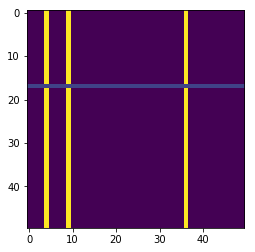

In [110]:
image = get_splitted_image(50, 5)
plt.imshow(image)
plt.show()

Fill all of outer space which is in other color  
Peek color of a pixel and paint all pixels of this color in given color using recursion

In [112]:
# helper class of point in matrix
class Point:
    def __init__(self, i, j):
        self.i = i
        self.j = j
    
    def neighbors(self, n):
        'n-1 is an upper limit of available space'
        points = []
        for di in [-1, 0, 1]:
            for dj in [-1, 0, 1]:
                new_i = self.i - di
                new_j = self.j - dj
                
                if 0 < new_i < n and 0 < new_j < n:
                    points.append(Point(new_i, new_j))
        return points   

In [115]:
# naive implementation
# for each point some neigbor points are checked more than one time!
def fill(image, point, color):
    def fill_point(point, old_color, color):
        'old_color - initial color of start pixel'
        if image[point.i][point.j] == old_color:
            image[point.i][point.j] = color
            for near_point in point.neighbors(len(image)):
                fill_point(near_point, old_color, color)
    
    old_color = image[point.i, point.j]
    fill_point(point, old_color, color)

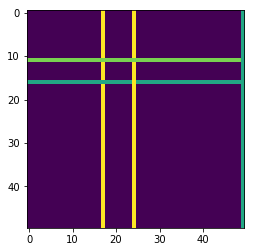

In [116]:
# before
image = get_splitted_image(50, 5)
plt.imshow(image)
plt.show()

In [117]:
fill(image, Point(11, 10), 3)

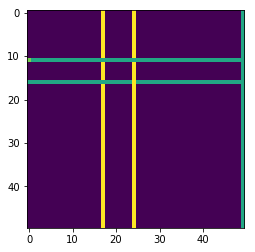

In [118]:
# after
plt.imshow(image)
plt.show()

In [121]:
fill(image, Point(30, 30), 1)

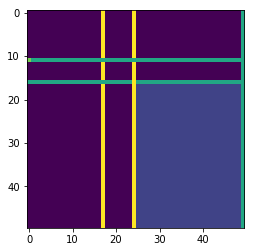

In [123]:
# after
plt.imshow(image)
plt.show()

### 9.8 Money

mem: $O(2^{n+1} - 1)$  
time: $O(2^{n+1} + 2^nlog_2n) = O(2^nlog_2n)$  
where second term is to add each num of last level of call tree to a set (which is probably a binary tree of search)

In [3]:
# Don't know how to use dp here
# because we don't have relations between different dp[i] and dp[j]
# So just a rising recursion
# 

def repr_count(n):
    coins = [1, 5, 10, 15]
    coins_for_n = set()
    
    def take_coin(cur_summ, coins_count):
        for coin in coins:
            new_summ = cur_summ + coin
            new_count = coins_count + 1
            if new_summ == n:
                coins_for_n.add(new_count)    
            elif new_summ < n:
                take_coin(new_summ, new_count)
            elif new_summ > n:
                return
    
    take_coin(0, 0)
    return len(coins_for_n)

In [6]:
repr_count(10)

4

In [17]:
# Solution above will fail
# Here is the test case (2 different sets of 3 coins with equal summ)
# 25 25 5
# 25 15 15
coins = [1, 5, 10, 25]
new_denom = dict(zip(coins[1:], coins[:-1]))

def make_change(n, denom):
    if denom == 1:
        return 1
    next_denom = new_denom[denom]
    
    ways = 0
    for denoms_cost in range(0, n+1, denom):
        ways += make_change(n-denoms_cost, next_denom)
    
    return ways

In [18]:
make_change(10, coins[-1])

4

In [9]:
new_denom

{5: 1, 10: 5, 25: 10}

### 9.9 queens placement

mem: $complexity = n + n!$ (due to recursion stack length) $O(n!)$  
time: $O(n!\, n^2$(due to position check)$)$

In [69]:
# До сих пор не понимаю строк 8 и 10
# todo буду коцать его и разберу в конце концов
def heap_permute(n, A):
    if n == 1:
        yield A
    else:
        for i in range(n):
            yield from heap_permute(n-1, A)
            if n % 2 != 0:
                A[0], A[n-1] = A[n-1], A[0]
            else:
                A[i], A[n-1] = A[n-1], A[i]

In [62]:
import numpy as np

def check_placement(queens):
    for v, h in enumerate(queens):
        for o_v, o_h in enumerate(queens):
            if v != o_v:
                dv, dh = o_v - v, o_h - h
                beaten_on_diagonal = abs(dv) == abs(dh)
                if beaten_on_diagonal:
                    return False
    return True

# Nice idea is to draw lines of queens danger
def print_placement(queens):
    n = len(queens)
    for h in range(n):
        for v in range(n):
            if v == queens[h]:
                print('Q', end='')
            else:
                print(' ', end='')
        print(' ')
    print()
    

def queens_safe_placements(n):
    # Index is a vertical, value is a horizontal
    queens = list(range(n))
    placements_count = 0
    
    # placement is a safe on verticals and horizontals
    # but not always on diagonals
    for queens_placement in heap_permute(n, queens):
        good_placement = check_placement(queens_placement)
        if good_placement:
            print_placement(queens) # or yield
            placements_count += 1
            
    return placements_count

In [41]:
def test_placement(queens):
    print("Is placement {} is good? {}".format(queens, 
                                               check_placement(queens)))
    print_placement(queens)

In [63]:
bad_placement = [0,1,2,3]
good_placement = [2,0,3,1]

test_placement(bad_placement)
test_placement(good_placement)

Is placement [0, 1, 2, 3] is good? False
Q    
 Q   
  Q  
   Q 

Is placement [2, 0, 3, 1] is good? True
  Q  
Q    
   Q 
 Q   



In [68]:
queens_safe_placements(4)

  Q  
Q    
   Q 
 Q   

 Q   
   Q 
Q    
  Q  



2

### 9.10 Stacks of boxes

Я заметил несколько вариантов решения в зависимости от трактовки условия  
Самое привлекательное - когда ящики нельзя поворачивать и можно ставить начиная сверху

In [28]:
class Box:
    'h is the third dimension'
    def __init__(self, w, d, h):
        self.w = w
        self.d = d
        self.h = h
    
    def __repr__(self):
        return f'[width: {self.w}, depth: {self.d}, height: {self.h}]'

In [42]:
def make_stack(boxes):
    boxes.sort(key=lambda b: b.w) # O(nlogn)
    boxes.sort(key=lambda b: b.d)
    boxes_stack = [boxes[0]]
    prev_box = boxes[0]
    for box in boxes[1:]: # Build from top (shoose smallest)
        if prev_box < box:
            boxes_stack.insert(0, box)
            prev_box = box
        
    return list(reversed(boxes_stack))

In [43]:
boxes = [Box(1,10,2), Box(2,3, 30), Box(30, 1, 10), Box(1, 1, 100)]

make_stack(boxes)

[[width: 1, depth: 1, height: 100], [width: 2, depth: 3, height: 30]]

Вышло не так красиво как предпологалось. Была заминка в сортировке.  
Так решение около n log n.  

### 9.11 Logic operations

Approaches with signs sorting

In [34]:
def equal_expressions(expression, result):
    # Instead of evaluating each operation 
    # in order will be fun to add brackets in expression string
    # It's nice for visualization but may be slower and harder to implment
    
    operations_indices = range(1, n, 2)
    num_operations = len(operations_indices)
    
    for operations_order in heap_permute(operations_indices):

In [41]:
class Operand:
    def __init__(self, type, left, right):
        self.type = type
        self.left = left
        self.right = right

In [ ]:
# TODO later
def tree_from_order(expression: list, operations_order: list):
    # Operations order is an indices of operations in some order
    for op_i in operations_order:
        left_operand = expression[op_i-1]
        right_operand = expression[op_i+1]
        operation_type = expression[op_i]
        
        operand = Operand(operation_type, left_operand, right_operand)

In [ ]:
def print_expression(expression:list, operations_order: list):
    
    def helper(l, r, )

My naive approach  
It will take too much memory.  
Don't like it.  

In [ ]:
def equal_expressions(expression: list, result):
    n = len(expression)
    operations_indices = list(range(1, n, 2))
    
    def helper(operations_lasts, )